# Case study ME 2023, part 2 (85p)

De figuur hieronder laat een versimpelde weergave zien van het metabolisme van een industriële stam die genetisch gemodificeerd is voor de productie van 1,3 propaandiol (1,3PD) uit glucose.

![Image](Figure1.jpg)

***Fig 1. Het metabolisme van de 1,3PD producerende stam. Ook de reversibele reacties (v4, v5, v6 en v7) zijn aangegeven met een enkele pijl. De pijlen geven slechts aan in welke richting deze reacties in dit systeem meestal zullen lopen.***

Aan de hand van een stoichiometrisch model gaan we de geschiktheid van deze stam voor 1,3PD productie in een grootschalig fermentatie proces onderzoeken en de invloed van aanpassingen van het proces alsmede het organisme op verbetering van de prestaties berekenen.

Een deel van de antwoorden op de vragen dienen te worden ingeleverd in de vorm van een excel file *("ME case part2.xlsx")* met daarin de volgende worksheets:
- Vraag 1
- Vraag 4
- Vraag 5
- Vraag 6b
- Vraag 6d
- Vraag 6e
- Vraag 7a
- Vraag 7e
- Vraag 7f

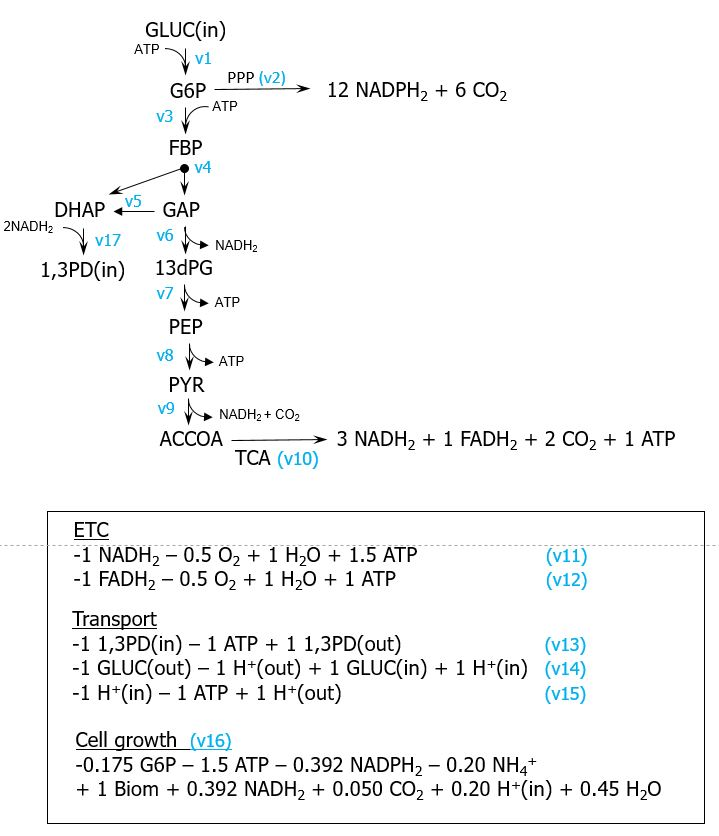

In [25]:
from IPython.display import display, Image
display(Image(filename='Figure1.JPG'))


## Vraag 1 (5p).
De steady state materiaal balansen voor een metabool systeem kunnen worden geschreven in de vorm van de volgende matrix vergelijking:

<b>S.v = 0</b>
 
Hierbij is <b>S</b> een matrix and <b>v</b> een vector die alle reactiesnelheden en netto conversiesnelheden bevat.

Construeer de matrix <b>S</b> voor de 1,3PD producerende stam in worksheet <b>Vraag1</b> van de excel file <b>ME case part2.xlsx</b>.<br>
Gebruik hiervoor het versimpelde metabolisme weergeven in Fig. 1. Gebruik als voorbeeld slide 14 van module 6.1.

Voor matrix S: zie excel sheet tab 1


## Vraag 2 (8p)
a.) Bereken, mbv python het aantal rijen, het aantal kolommen en de rang van de verkregen matrix. Lees daartoe de matrix in mbv het pandas commando **read_excel**.
Check de uitkomst: de matrix dient 23 rijen en 25 kolommen te bevatten en de rang moet 23 zijn. Als dat niet zo is dan klopt de matrix niet. Loop de matrix zorgvuldig na en haal de foutjes er uit. Dit is belangrijk want je gaat hier straks verder mee rekenen. (5p)

In [26]:
import pandas as pd 
import numpy as np
import sympy as sp

matrix1 = pd.read_excel('ME case part2.xlsx', sheet_name="Vraag1", header=0, index_col=0) #lees de matrix in (als dataframe)

#je code hieronder:
#Converteer het dataframe tot een numpy array S
S= np.asarray(matrix1)
#Bepaal het aantal rijen en kolommen met S.shape
size_S = S.shape
#converteer de numpy array tot een sympy matrix middels het sympy commando sp.Matrix(S)
S = sp.Matrix(S) 
#Bepaal de rang van de matrix met het sympy commando S.rank()
rank= S.rank()

print ("De dimensies van de matrix is:", size_S, "\n")
print ("De rang van de matrix is:", rank, "\n")


De dimensies van de matrix is: (23, 25) 

De rang van de matrix is: 23 




b.) Wat kun je afleiden uit het antwoord van 2a qua aantal vergelijkingen, aantal onbekenden en aantal vrijheidsgraden van dit systeem? (3p)

## *Je antwoord op vraag 2b hieronder:*
<br><br><br><br><br>
Er zijn 2 vrijheidsgraden, er zijn namelijk 23 rijen en 25 kolommen. Dus 25-23 =2, dus 2 vrijheidsgraden. Dit betekent dat je twee rates zal moeten definiëren om het systeem te kunnen oplossen.

# Vraag 3 (8p).
Bepaal alle mogelijke fluxverdelingen voor dit systeem met als randvoorwaarde dat de steady state materiaalbalansen sluiten (**S.v = 0** ). Dit noemen we de nulruimte of nullspace. Doe dit met als bekende (input) snelheden de specifieke groeisnelheid (de productiesnelheid van biomassa (Biom)) en de specifieke productvormingssnelheid (de productiesnelheid van 1,3PD). Zet daartoe de corresponderende kolommen aan de rechterkant van de matrix.

a.)	Bereken de nullspace van de matrix **S** mbv python. De code voor het opslaan van de berekende nullspace in excel is al gegeven. (5p)


In [27]:
import xlsxwriter as xls

#je code hieronder:
#Bepaal de nullspace met het sympy commando null = S.nullspace()
null = S.nullspace() 
#Converteer het resultaat (een list) in een numpy array met np.array(null)
null= np.array(null)
#Bepaal het aantal rijen en kolommen met null.shape
size_null = null.shape
nullarray = null
#Pas de onderstaande code zonodig aan
workbook = xls.Workbook('Nullspace.xlsx')
worksheet = workbook.add_worksheet()

for i in range(size_null[0]):
    for j in range(size_null[1]):
        worksheet.write(j, i, nullarray[i, j])

workbook.close()

nullspace = pd.read_excel('Nullspace.xlsx', header=None)
print ("The nullspace of S is:")
compounds = matrix1.columns
nulls = np.array(nullspace.T).T
for i in range(len(compounds)):
    print (compounds[i], nulls[i])


The nullspace of S is:
v1 [0.28403333 0.775     ]
v2 [ 3.26666667e-02 -1.95573091e-17]
v3 [0.07636667 0.775     ]
v4 [0.07636667 0.775     ]
v5 [-0.07636667  0.225     ]
v6 [0.15273333 0.55      ]
v7 [0.15273333 0.55      ]
v8 [0.15273333 0.55      ]
v9 [0.15273333 0.55      ]
v10 [0.15273333 0.55      ]
v11 [1.15566667 0.75      ]
v12 [0.15273333 0.55      ]
v13 [0. 1.]
v14 [0.28403333 0.775     ]
v15 [0.48403333 0.775     ]
v16 [1. 0.]
v17 [1.26566044e-16 1.00000000e+00]
qs [-0.28403333 -0.775     ]
qH [ 2.00000000e-01 -1.23784549e-15]
qH20 [1.7584 1.3   ]
qCO2 [0.7042 1.65  ]
qO2 [-0.6542 -0.65  ]
qNH4 [-2.00000000e-01  1.17343855e-16]
µ [1. 0.]
qPD [0. 1.]


b.)	Welke drie conclusies kun je trekken aan de hand van de berekende nullspace? (3p)

## *Je antwoord op vraag 3b hieronder:*
<br><br><br><br><br>
Er zijn geen dead-ends.
Er zijn twee flux modes, of maximale groei(µ) of maximale productvorming(qp)
???

# Vraag 4 (8p)
a.) Gebruik de verkregen nullspace om alle reactie en netto conversiesnelheden uit te drukken als functie van de specifieke productiesnelheden van biomassa en 1,3PD. Het is het handigst om dit in excel te doen. Bereken alle onbekende snelheden voor een specifieke groeisnelheid $\mu$ = 0.1 h<sup>-1</sup> en specifieke 1,3PD productiesnelheid qP = 0.05 molP/molX/h. Op slide 23 van module 6.1 zie je hoe je dit aanpakt. (5p)<br><br> 
b.) Bereken de yield van 1,3PD op glucose. (3p)<br><br>
Als het niet gelukt was om de nullspace bij vraag 3a te bepalen dan kun je als alternatief gebruik maken van de gegeven nullspace in de excel file (tabblad vraag4_alt).

Geef je antwoord in worksheet *Vraag4* in de excel antwoord file *ME case part2.xlsx*.


# Vraag 5 (5p)
Bereken de maximale yields van biomassa en 1,3PD op glucose. Hint: dit doe je door met (de oplossing van) dit model (= antwoord op vraag 4) alleen biomassa of alleen product te maken.

Geef je antwoord in worksheet **Vraag5** in de excel antwoord file **ME case part2.xlsx.**

# Vraag 6 (20p)
Zoals je in Fig. 1 kunt zien is de vorming van 1,3PD uit de precursor DHAP een reductie waarvoor 2 NADH<sub>2</sub> nodig is. Deze elektronen moeten geleverd worden door glucose omdat glucose de enige elektronen donor is in dit systeem. Een slimme student stelt voor om mierenzuur als additionele elektronendonor te gebruiken, waardoor de yield van 1,3PD op glucose verhoogd kan worden. Middels het enzym formiaat dehydrogenase wordt mierenzuur omgezet in CO<sub>2</sub> en NADH<sub>2</sub>:

-1 CH<sub>2</sub>O<sub>2</sub> + 1 CO<sub>2</sub> + 1 NADH<sub>2</sub>

Mierenzuur kan worden geproduceerd door elektrochemische reductie van CO<sub>2</sub>. Het gebruik van mierenzuur als elektronendonor kan dus worden beschouwd als een manier om (duurzaam opgewekte) elektriciteit te gebruiken voor reductie reacties in biotechnologische processen waarbij de geproduceerde CO<sub>2</sub> wordt gerecycled.

a.)	Beredeneer op grond van het metabole schema in Fig. 1 wat de maximale yield is van 1,3PD op glucose als mierenzuur als elektronendonor wordt gebruikt. (5p)


## *Je antwoord op vraag 6a hieronder:*
<br><br><br><br><br>
door mierenzuur als elektronen donor te gebruiken, kunnen er meer elektronen van glucose naar de productie vban 1,3PD(in) in plaats van dat er elektronen naar NADH2 en FADH2 gaan, deze conserved moieties moeten namelijk weer worden omgezet in ATP anders loopt de reactie stuk. 
Als er NADH2 zal worden geproduceerd voor de reactie tijdens v17, dan zal de een heel deel van de reactie vanuit glucose niet plaats vinden, er zal vanuit 1 mol glucose 2 mol FBP gevormd kunnen worden die beide omgezet kunnen worden tot 1,3PD(in), mits er gebruik wordt gemaakt van 2 mol mierenzuur per mol glucose. Vanwege dit geldt dat alle C van glucose naar 1,3PD(in) zal gaan, per mol glucose wordt er 2 mol 1,3PD(in) gevormd, dus dit geeft een opbrengst van 2/1 = 2 mol product/mol substraat 

b.)	Breid je stoichiometrisch model uit met een reactie voor de import van mierenzuur en de reactie voor mierenzuur dehydrogenase. Mierenzuur wordt in de vorm van het anion (formiaat) via een proton symport geïmporteerd. Het substraat voor mierenzuur dehydrogenase is echter het ongedissocieerde zuur. Houdt hier rekening mee in je model! (5p) 


Antwoord: voor de nieuwe matrix, zie excel bestand


Geef de matrix van het uitgebreide model in worksheet **Vraag6b** in de excel antwoord file **ME case part2.xlsx**

c.)	Los het model op mbv Python door het bepalen van de nullspace waarbij je alle reactie en overige netto conversiesnelheden uitdrukt als functie van de specifieke groeisnelheid $\mu$, de specifieke 1,3PD productiesnelheid en de specifieke formiaat consumptiesnelheid. (5p)


In [28]:
matrix2 = pd.read_excel('ME case part2.xlsx', sheet_name="Vraag6b", header=0, index_col=0) #lees de matrix in (als dataframe)

#je code hieronder:
#Converteer het dataframe tot een numpy array S
S= np.asarray(matrix2)
#Bepaal het aantal rijen en kolommen met S.shape
size_S = S.shape
#converteer de numpy array tot een sympy matrix middels het sympy commando sp.Matrix(S)
S = sp.Matrix(S) 
#Bepaal de rang van de matrix met het sympy commando S.rank()
rank= S.rank()


print()
print ("De dimensies van de matrix:", size_S, "\n")
print ("De rang van de matrix:", rank, "\n")
#je code hieronder
#Bepaal de nullspace met het sympy commando null = S.nullspace()
null = S.nullspace()
#Converteer het resultaat (een list) in een numpy array met np.array(null)
null = np.array(null)
#Bepaal het aantal rijen en kolommen met null.shape
size_null = null.shape
nullarray = null

#Pas de onderstaande code zonodig aan
workbook = xls.Workbook('Nullspace2.xlsx')
worksheet = workbook.add_worksheet()

for i in range(size_null[0]):
    for j in range(size_null[1]):
        worksheet.write(j, i, nullarray[i, j])

workbook.close()

#Pas de onderstaande code zonodig aan
nullspace = pd.read_excel('Nullspace2.xlsx', header=None)
print ("Nullspace:")
compounds = matrix2.columns
nulls = np.array(nullspace.T).T
for i in range(len(compounds)):
    print (compounds[i], nulls[i])



De dimensies van de matrix: (25, 28) 

De rang van de matrix: 25 

Nullspace:
v1 [0.28403333 0.775      0.075     ]
v2 [ 3.26666667e-02 -7.85692025e-18 -4.01779631e-17]
v3 [0.07636667 0.775      0.075     ]
v4 [0.07636667 0.775      0.075     ]
v5 [-0.07636667  0.225      -0.075     ]
v6 [0.15273333 0.55       0.15      ]
v7 [0.15273333 0.55       0.15      ]
v8 [0.15273333 0.55       0.15      ]
v9 [0.15273333 0.55       0.15      ]
v10 [0.15273333 0.55       0.15      ]
v11 [ 1.15566667  0.75       -0.25      ]
v12 [0.15273333 0.55       0.15      ]
v13 [0. 1. 0.]
v14 [0.28403333 0.775      0.075     ]
v15 [0.48403333 0.775      0.075     ]
v16 [1. 0. 0.]
v17 [-1.77425241e-16  1.00000000e+00 -1.37124942e-16]
v18 [ 0.  0. -1.]
v19 [ 1.62740055e-15  1.35616712e-15 -1.00000000e+00]
qs [-0.28403333 -0.775      -0.075     ]
qH [ 2.00000000e-01 -1.29570989e-15  1.00000000e+00]
qH20 [ 1.7584  1.3    -0.1   ]
qCO2 [ 0.7042  1.65   -0.55  ]
qO2 [-0.6542 -0.65    0.05  ]
qNH4 [-2.00000000e-01

d.) Geef je oplossing voor een specifieke groeisnelheid 𝜇 = 0.1 h<sup>-1</sup> en specifieke 1,3PD productiesnelheid qP = 0.05 molP/molX/h en de specifieke formiaat consumptiesnelheid in worksheet **Vraag6d** in de excel antwoord file **ME case part2.xlsx**

Probeer wat er gebeurt bij verschillende formiaat consumptiesnelheden (let op: consumptie dus een negatieve waarde). Noteer je bevindingen in dezelfde worksheet.


Antwoord: zie excel sheet 


e.)	Bereken de maximale yields van biomassa en 1,3PD op glucose met mierenzuur als elektronendonor en vergelijk deze met de situatie zonder mierenzuur. Let er hierbij op dat zowel de elektronen transportketen (ETC) als de TCA cyclus irreversibel zijn. Dit kun je doen door de formiaat consumptiesnelheid handmatig aan te passen of door de excel solver te gebruiken om de maximale formiaat consumptiesnelheid te vinden voor een gegeven groei en/of productvormingssnelheid. (5p)

Geef je oplossing in worksheet **Vraag6e** in de excel antwoord file **ME case part2.xlsx**


***side note: tijdens werkcollege werd gezegd dat met de excel solver een negatieve waarde voor de rates verwaarloosbaar was***


# Vraag 7 (31p)
Een andere student oppert dat wanneer mierenzuur als elektronendonor wordt gebruikt de TCA cyclus niet meer nodig is. Alle benodigde elektronen, in de vorm van NADH<sub>2</sub> kunnen immers geleverd worden door het mierenzuur.

a.)	Pas het stoichiometrische model aan door het verwijderen van de TCA cyclus (v10). (5p)

Geef de matrix van het aangepaste model in worksheet **Vraag7a** in de excel antwoord file **ME case part2.xlsx**

b.) Beredeneer wat het aantal vrijheidsgraden is van het aangepaste model. (3p)


## *Je antwoord op vraag 7b hieronder:*
<br><br><br><br><br>
Het aantal vrijheidsgraden is verminderd met 1, vanwege het verwijderen van een kolom en het gelijk blijven van het aantal rijen. Nu zijn er namelijk nog steeds 25 rijen, maar 27 kolommen. 27-25=2

c.)	Bereken de nullspace van de verkregen matrix mbv python. (5p)

In [29]:
#code:
matrix3 = pd.read_excel('ME case part2.xlsx', sheet_name="Vraag7a", header=0, index_col=0) #lees de matrix in (als dataframe)
# je code hieronder

#Converteer het dataframe tot een numpy array S
S= np.asarray(matrix3)
#Bepaal het aantal rijen en kolommen met S.shape
size_S = S.shape
#converteer de numpy array tot een sympy matrix middels het sympy commando sp.Matrix(S)
S = sp.Matrix(S) 
#Bepaal de rang van de matrix met het sympy commando S.rank()
rank= S.rank()

print()
print ("De dimensies van de matrix:", size_S, "\n")
print ("De rang van de matrix:", rank, "\n")

# je code hieronder
#Bepaal de nullspace met het sympy commando null = S.nullspace()
null = S.nullspace()
#Converteer het resultaat (een list) in een numpy array met np.array(null)
null = np.array(null)
#Bepaal het aantal rijen en kolommen met null.shape
size_null = null.shape
nullarray = null

#Pas de onderstaande code zonodig aan
workbook = xls.Workbook('Nullspace3.xlsx')
worksheet = workbook.add_worksheet()

for i in range(size_null[0]):
    for j in range(size_null[1]):
        worksheet.write(j, i, nullarray[i, j])

workbook.close()

#Pas de onderstaande code zonodig aan
nullspace = pd.read_excel('Nullspace3.xlsx', header=None)
print ("Nullspace:")
compounds = matrix3.columns
nulls = np.array(nullspace.T).T
for i in range(len(compounds)):
    print (compounds[i], nulls[i])


De dimensies van de matrix: (25, 27) 

De rang van de matrix: 25 

Nullspace:
v1 [0.20766667 0.5       ]
v2 [ 3.26666667e-02 -2.46654694e-16]
v3 [-1.79517024e-15  5.00000000e-01]
v4 [-1.79517024e-15  5.00000000e-01]
v5 [-4.12551805e-16  5.00000000e-01]
v6 [-4.84812451e-16 -1.45380642e-15]
v7 [-4.84812451e-16 -1.45380642e-15]
v8 [0. 0.]
v9 [0. 0.]
v11 [1.38216506 1.66666667]
v12 [0. 0.]
v13 [0. 1.]
v14 [0.20766667 0.5       ]
v15 [0.47142911 0.5       ]
v16 [1. 0.]
v17 [8.25049141e-16 1.00000000e+00]
v18 [0.99107652 3.66666667]
v19 [0.96393862 3.66666667]
qs [-0.20766667 -0.5       ]
qH [-0.78987439 -3.66666667]
qH20 [1.80325686 1.66666667]
qCO2 [1.2415327  3.66666667]
qO2 [-0.6694044  -0.83333333]
qNH4 [-2.00000000e-01  1.80880109e-15]
qMZ [-0.99107652 -3.66666667]
µ [1. 0.]
qPD [0. 1.]


d.) Wat kun je concluderen op grond van de berekende nullspace? Kun je suggesties geven voor de vereenvoudiging van het model en zo ja welke? (3p)

## *Je antwoord op vraag 7d hieronder:*
<br><br><br><br><br>
er zijn nu drie dead ends ontstaan in de nullspace. Daarnaast kan geconcludeerd worden dat er inderdaad maar 2 vrijheidsgraden zijn in plaats van 3.  Voor de vereenvoudiging van het model kunnen alle rates die leiden naar de TCA (v6-v9) weg gelaten worden aangezien die in beide flux modes gelijk zijn aan 0, wat ook te begrijpen is aangezien dit intermediaren zijn en zonder te TCA cyclus heb je er in dit model niks aan.  

e.) Bereken de maximale yields van biomassa en 1,3PD op glucose. (5p)

Geef je antwoord in worksheet **Vraag7e** in de excel antwoord file **ME case part2.xlsx**



f.) Het gebruik van mierenzuur als elektronendonor leidt tot een significante verhoging van zowel de yield van biomassa als de yield van 1,3PD op glucose. Hoe zit het eigenlijk met de yields van product en biomassa op O<sub>2</sub> en CO<sub>2</sub>? Bereken deze yields en vergelijk deze met de uitkomsten verkregen in vraag 5 (glucose als C- en elektrondonor). (5p)

Geef je antwoord in worksheet **Vraag7f** in de excel antwoord file **ME case part2.xlsx**

g.)	Geef een verklaring voor de veranderingen in de yields van biomassa en 1,3PD op O<sub>2</sub> en CO<sub>2</sub> wanneer mierenzuur als elektronendonor wordt gebruikt. (5p)

## *Je antwoord op vraag 7g hieronder:*
<br><br><br><br><br>
